In [155]:
import pandas as pd

import os

from matplotlib import pyplot

In [156]:
signalPath="D:\PythonJupyter\MyDev\FinPythonLab\ML-S50F\ML-S50F\Filter_MLPrediction\AB-result"
signalFile="long_MLP-_17x17_epo105_btch32_tn2007-2018_B1.csv"
file_path=os.path.abspath(f'{signalPath}\\{signalFile}')
file_path

'D:\\PythonJupyter\\MyDev\\FinPythonLab\\ML-S50F\\ML-S50F\\Filter_MLPrediction\\AB-result\\long_MLP-_17x17_epo105_btch32_tn2007-2018_B1.csv'

In [157]:

df=pd.read_csv(file_path,index_col='Date/Time',parse_dates =['Date/Time'],dayfirst=True)

df.drop(columns='Ticker',inplace=True)

print(df.info())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7838 entries, 2019-01-02 09:45:00 to 2020-06-10 16:45:00
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   actual_long   7838 non-null   int64 
 1   predict_long  7838 non-null   int64 
 2   nBar          7838 non-null   int64 
 3   dBar          7838 non-null   object
dtypes: int64(3), object(1)
memory usage: 306.2+ KB
None


actual_long     0
predict_long    0
nBar            0
dBar            0
dtype: int64

In [158]:
dfTrend=df.query('predict_long==1')[['nBar']]
print(dfTrend.shape)

(2452, 1)


In [159]:
dfTrend.head(10)

,nBar
Date/Time,
2019-01-23 12:15:00,0
2019-01-23 14:15:00,1
2019-01-23 14:30:00,2
2019-01-23 14:45:00,3
2019-01-23 15:00:00,4
2019-01-23 15:15:00,5
2019-01-23 15:30:00,6
2019-01-23 15:45:00,7
2019-01-23 16:00:00,8


In [160]:
dfTrend.tail(100)

,nBar
Date/Time,
2020-06-04 12:15:00,69
2020-06-04 14:15:00,70
2020-06-04 14:30:00,71
2020-06-04 14:45:00,72
2020-06-04 15:00:00,73
...,...
2020-06-10 15:45:00,164
2020-06-10 16:00:00,165
2020-06-10 16:15:00,166


In [162]:
df_lastToChange=dfTrend[dfTrend['nBar'].shift(-1)==0 ].sort_values(by='nBar')
df_lastToChange.nBar.value_counts().sort_index()

3      3
5      1
7      1
10     1
18     1
19     1
20     1
21     1
25     1
29     1
34     1
39     1
48     1
70     1
72     1
80     2
89     1
111    1
144    1
199    1
334    1
372    1
422    1
Name: nBar, dtype: int64

In [143]:
df_lastToChange.describe()

,nBar
count,59.000000
mean,124.983051
std,196.877652
min,0.000000
25%,6.000000
50%,24.000000
75%,160.000000
max,922.000000


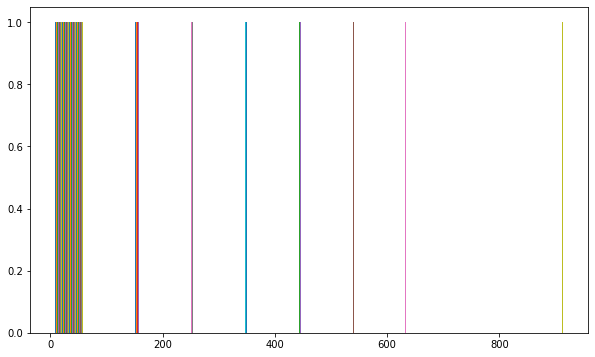

In [144]:
pyplot.figure(figsize=(10,6))
pyplot.hist(df_lastToChange)
pyplot.show()

In [145]:
dfNbar=dfTrend[ (dfTrend[col_CountNBars].shift(-1)== dfTrend[col_CountNBars])  & (dfTrend[col_CountNBars].shift(1)!= dfTrend[col_CountNBars])]
dfNbar.shape

(2, 1)